**1.** Plot Planck's Law for various temperatures $T=10\:K$, $T=100\:K$, $T=1000\:K$, and $T=10000\:K$ to obtain a figure similar to the Figure below.

**Answer:**

Import the necessary libraries first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
import sympy

Initialize the constants

In [2]:
h = 6.626e-34            #Joule s
c = 2.998e8              #m per s
kb = 1.38e-23            #Joule per Kelvin
wienConstant = 2.897e-3  #m Kelvin

Define the planck law function

In [3]:
def planck(l,T):
    b = h*c/(l*kb*T)
    a = 2.0*h*(c**2)/(l**5)
    I = a/(np.exp(b)-1)
    return I

Create a frequency grid and solve the equation

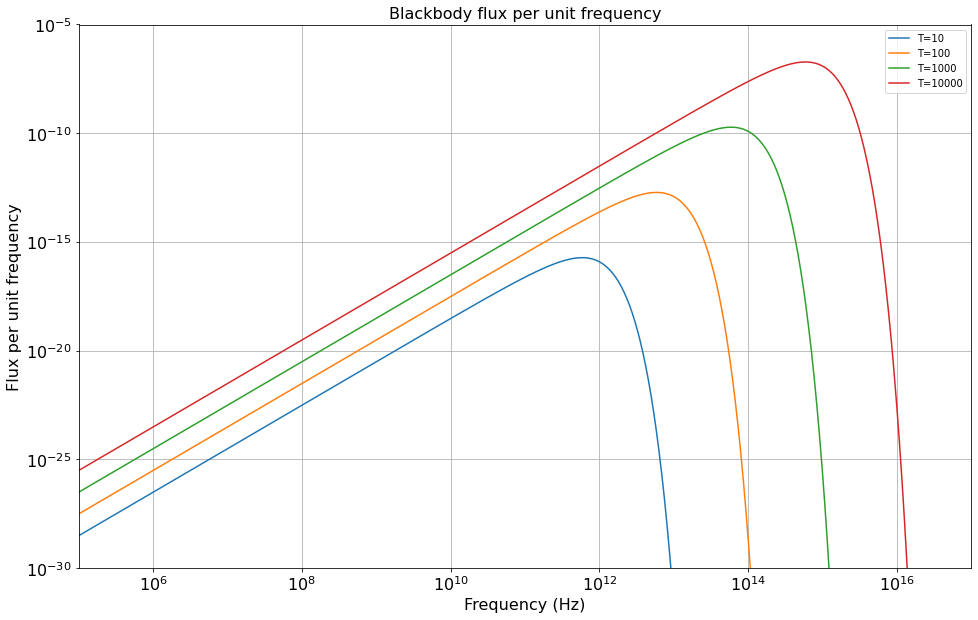

In [4]:
Tbody = np.array([10.0,100.0,1000.0,10000.0])
l_peak = wienConstant/Tbody

fig, ax = plt.subplots(1,1, figsize=(16,10))

for ti,T in enumerate(Tbody):
    # logarithmic scale grid of wavelength from 0.01*peak to 1e10*peak
    l = np.logspace(-2,10,1000) * l_peak[ti]
    flux = planck(l,T)
    
    # convert the wavelength into frequency
    v = c/l
    # convert blackbody flux from wavelength-based equation to frequency
    flux_v = flux*(l**2/c)
    ax.plot(v,flux_v, label='T=%d'%T)

ax.set_xlabel('Frequency (Hz)', fontsize=16)
ax.set_ylabel('Flux per unit frequency', fontsize=16)
ax.set_title('Blackbody flux per unit frequency', fontsize=16)
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xbound(1e5,1e17)
ax.set_ybound(1e-30,1e-05)
plt.yticks([1e-30, 1e-25, 1e-20, 1e-15, 1e-10, 1e-5], fontsize=16)
plt.xticks([1e6, 1e8, 1e10, 1e12, 1e14, 1e16], fontsize=16)
ax.grid()
plt.show()

======================================================================================================================

**2.** Derive Wien's displacement law from Planck's law. To do this take the derivative $I$ wrt $v$ and equate to 0 to find at which frequency the spectrum peaks ($dI/dv=0$). This should finally give

$$3(e^x-1)-xe^x$$

where $x\equiv hv/k_BT$. Now, solve this equation numerically to find

$$x\simeq 2.8214$$

**Answer:**

From Planck's Law:

$$I(v,T) = \frac{2hv^3}{c^2}\frac{1}{e^{hv/k_BT}-1}$$

Differentiate wrt $v$ and set it to 0:

$$
\begin{aligned}
\frac{dI}{dv} &= \frac{2h}{c^2} \frac{d}{dv} \left[ v^3(e^{hv/k_BT}-1)^{-1} \right] = 0 \\
              &= \frac{2h}{c^2} \left[ 3v^2(e^{hv/k_BT}-1)^{-1} - v^3(e^{hv/k_BT}-1)^{-2}\left(\frac{h}{k_BT}\right)e^{hv/k_BT} \right] = 0
\end{aligned}
$$

So the expression becomes:

$$3v^2(e^{hv/k_BT}-1)^{-1} = v^3(e^{hv/k_BT}-1)^{-2}\left(\frac{h}{k_BT}\right)e^{hv/k_BT}$$

Simplified:

$$3(e^{hv/k_BT}-1)-\left(\frac{hv}{k_BT}\right)e^{hv/k_BT} = 0$$

Substituting $x = \frac{hv}{k_BT}$ the equation above becomes:

$$3(e^x-1) - xe^x =0$$

Rearranged:

$$(x-3)e^x+3=0$$

The code below solves the above equation numerically:

In [5]:
f = lambda x: (x-3)*np.exp(x) + 3
df = lambda x: (x-2)*np.exp(x)
root = optimize.newton(f,2.1, fprime=df)
print('x = {}'.format(root))

x = 2.8214393721220787


======================================================================================================================

**3.** Derive Stefan-Boltzmann's law

$$\varepsilon = \sigma T^4$$

from Planck's law. Here

$$\sigma = \frac{2\pi^5 k_{B}^{4}}{15h^3c^2} = 5.670\; x\; 10^8\; W\; m^{-2}\; K^{-4}$$

is the Stefan-Boltzmann's constant. To do this you will need to evaluate

$$\int_{0}^{\infty} \frac{x^3}{e^x-1} = \frac{\pi^4}{15}$$

**Answer:**

The power emitted per unit area of an emitting body is given by:

$$
\begin{aligned}
\frac{P}{A} &= \int_{0}^{\infty} I(v,T)dv \int cos \theta \, d\Omega \\
            &= \int_{0}^{\infty} I(v,T)dv \int_{0}^{2\pi} d\varphi \int_{0}^{\pi/2} cos \theta\,sin \theta \, d\theta \\
            &= \pi \int_{0}^{\infty} I(v,T)dv
\end{aligned}
$$

Plugging in Planck's Law:

$$I(v,T) = \frac{2hv^3}{c^2}\frac{1}{e^{hv/k_BT}-1}$$

yields,

$$\frac{P}{A} = \frac{2\pi h}{c^2} \int_{0}^{\infty} \frac{v^3}{e^{hv/k_BT}-1}\, dv$$

using substitution $x = \frac{hv}{k_BT}$, and $dx = \frac{h}{k_BT}dv$ gives,

$$\frac{P}{A} = \frac{2\pi h}{c^2} \left(\frac{k_BT}{h}\right)^4 \int_{0}^{\infty} \frac{x^3}{e^{x}-1}\, dx$$

The term $\frac{1}{e^x-1}$ can be expanded in terms of infinite series:

$$
\begin{aligned}
\frac{1}{e^x-1} = e^{-x}\left(\frac{1}{1-e^{-x}}\right) &= e^{-x} \sum_{n=0}^{\infty} e^{-nx} \\
                                                        &= \sum_{n=1}^{\infty} e^{-nx}
\end{aligned}
$$

And the integral term becomes:

$$\int_{0}^{\infty} \frac{x^3}{e^{x}-1}\, dx = \int_{0}^{\infty} x^3 \left(\sum_{n=1}^{\infty} e^{-nx}\right)dx$$

The following code evaluates the integral below:

$$\int_{0}^{\infty} x^3  e^{-nx}dx$$

In [6]:
x_integral = sympy.Symbol('x')
n = sympy.Symbol('n', nonzero=True)
I = sympy.integrate(x_integral**3*sympy.exp(-n*x_integral), (x_integral,0,sympy.oo), conds='none')
I

6/n**4

and so,

$$\int_{0}^{\infty} x^3  e^{-nx}dx = \frac{6}{n^4}$$

and:

$$\int_{0}^{\infty} \frac{x^3}{e^{x}-1}\, dx = \int_{0}^{\infty} x^3 \left(\sum_{n=1}^{\infty} e^{-nx}\right)dx = 6 \sum_{n=1}^{\infty} \frac{1}{n^4}$$

From Riemann Zeta Function:

$$\zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s}$$

Our sum terms can be evaluated into:

$$\zeta(4) = \sum_{n=1}^{\infty} \frac{1}{n^4}$$

The Riemann Zeta Function value can be evaluated by the code below:

In [7]:
riemann_zeta = sympy.functions.special.zeta_functions.zeta(4,1)
riemann_zeta

pi**4/90

and so,

$$\zeta(4) = \frac{\pi^4}{90}$$

and:

$$\int_{0}^{\infty} \frac{x^3}{e^{x}-1}\, dx = 6\,\zeta(4) = \frac{\pi^4}{15}$$

Returning to the Power emitted per unit Area equation:

$$\frac{P}{A} = \frac{2\pi h}{c^2} \left(\frac{k_BT}{h}\right)^4 \int_{0}^{\infty} \frac{x^3}{e^{x}-1}\, dx $$

So,

$$\varepsilon = \frac{2\pi h}{c^2} \left(\frac{k_BT}{h}\right)^4 \frac{\pi^4}{15}$$

Simplifying the equation,

$$\varepsilon = \frac{2\pi^5 k_{B}^{4}}{15h^3c^2}T^4 $$

$$\varepsilon = \sigma T^4$$